In [0]:
%tensorflow_version 2.x

In [0]:
#1. keras -> tensorflow.keras
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((x_train, y_train),(x_test, y_test))
(x_train, y_train),(x_test, y_test) = load_data()

In [47]:
#(6萬筆資料, 28*28)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [48]:
# Dropout: 在訓練中，故意丟掉n%神經元(推薦25%~50%)，最後在預測時要調整相同比例回來
# 一開始調整50%，後面權重就要 *50%
# 重要，有機會可以有不同觀點
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_dim=784))
mlp.add(Dropout(0.25))
mlp.add(Dense(10,activation="softmax"))
mlp.summary()
# Param = input * input + output 
# 100480 = 784*128+128(bias)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 最後一層個數
# 1:"binary_crossentropy" 2up:"categorical_crossentropy"
# 激活函數
# 1:"sigmoid" 2up:"softmax"
mlp.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
# mlp: 進去要1D，tensorflow: 輸入[-1, 1][0, 1]
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
# pd.DataFrame(x_train_norm)

In [51]:
# 答案要做one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0], y_train_cat[0])

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [59]:
# batch_size: 問多少筆資料進行一次梯度下降(平均)
# epochs: 整份資料要看幾次
# validation_sqlit: train_test_split驗證模型到底好不好
# verbose: log level(0:沒有  1:最多  2:適中)
# 270: 54000(train) / 200
# patience: 連續上升次數
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_callback = EarlyStopping(patience=3, restore_best_weights=True)
save_callback = ModelCheckpoint("fashion.h5", save_best_only=True)
mlp.fit(x_train_norm, 
        y_train_cat, 
        batch_size=200,
        epochs=50,
        validation_split=0.1,
        callbacks=[stop_callback, save_callback],
        verbose=2)

Epoch 1/50
270/270 - 1s - loss: 0.1305 - accuracy: 0.9498 - val_loss: 0.3795 - val_accuracy: 0.8955
Epoch 2/50
270/270 - 1s - loss: 0.1280 - accuracy: 0.9513 - val_loss: 0.3767 - val_accuracy: 0.8958
Epoch 3/50
270/270 - 1s - loss: 0.1266 - accuracy: 0.9519 - val_loss: 0.3734 - val_accuracy: 0.8942
Epoch 4/50
270/270 - 1s - loss: 0.1299 - accuracy: 0.9504 - val_loss: 0.3897 - val_accuracy: 0.8962
Epoch 5/50
270/270 - 1s - loss: 0.1299 - accuracy: 0.9512 - val_loss: 0.3919 - val_accuracy: 0.8940
Epoch 6/50
270/270 - 1s - loss: 0.1266 - accuracy: 0.9518 - val_loss: 0.3913 - val_accuracy: 0.8947


In [60]:
# predict: 機率  predict_classes: 類別
pre = mlp.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [61]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8912


[0.3989076018333435, 0.8912000060081482]

In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix
names= [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot"
        ]
c=["{}(預測)".format(i) for i in names]
i=["{}(正確)".format(i) for i in names]
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row), 3) for row in mat]
pd.DataFrame(mat, columns=c, index=i)

,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(正確),0.836,0.003,0.013,0.026,0.004,0.001,0.108,0.000,0.009,0.000
Trouser(正確),0.001,0.977,0.000,0.015,0.004,0.000,0.002,0.000,0.001,0.000
Pullover(正確),0.020,0.001,0.808,0.011,0.089,0.000,0.068,0.000,0.003,0.000
Dress(正確),0.017,0.005,0.011,0.911,0.027,0.002,0.024,0.000,0.003,0.000
Coat(正確),0.000,0.002,0.086,0.031,0.834,0.000,0.045,0.000,0.002,0.000
Sandal(正確),0.000,0.000,0.000,0.001,0.000,0.963,0.000,0.021,0.002,0.013
Shirt(正確),0.112,0.000,0.075,0.032,0.070,0.000,0.702,0.000,0.009,0.000
Sneaker(正確),0.000,0.000,0.000,0.000,0.000,0.015,0.000,0.940,0.001,0.044
Bag(正確),0.005,0.001,0.005,0.003,0.003,0.002,0.008,0.004,0.969,0.000
Ankle boot(正確),0.000,0.000,0.000,0.000,0.000,0.008,0.001,0.019,0.000,0.972


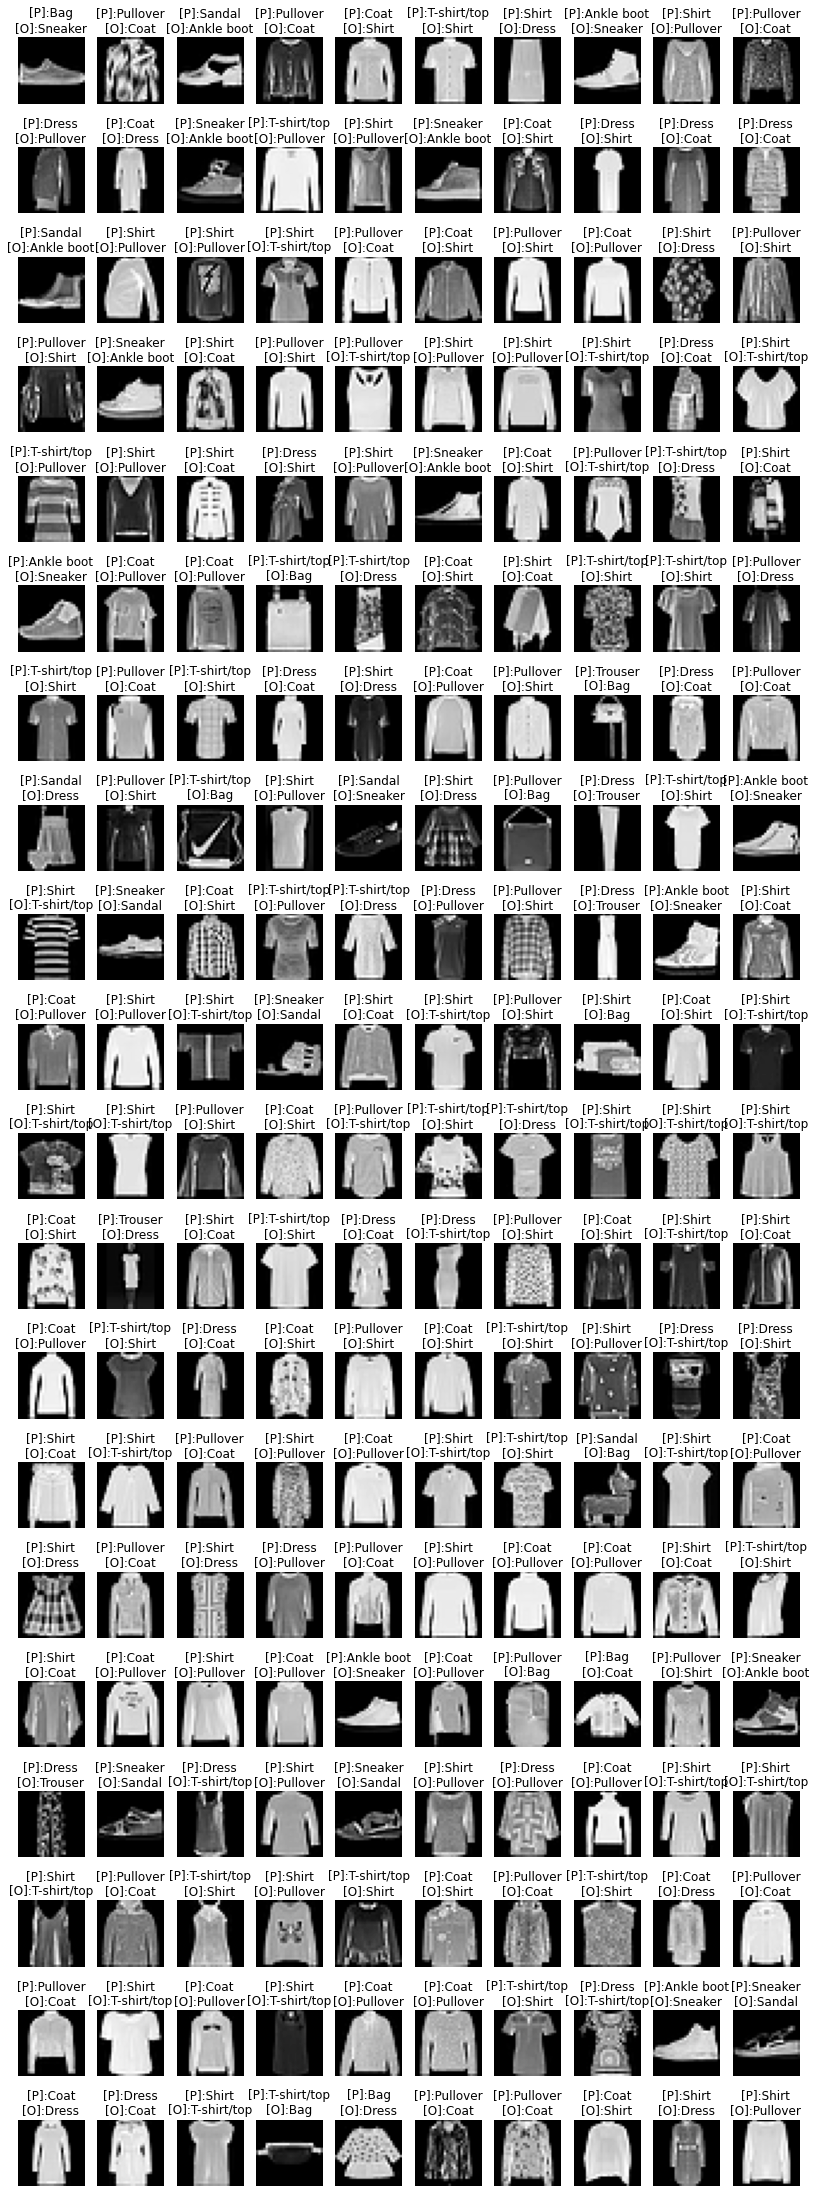

In [63]:
%matplotlib inline
# [:200] :太多錯誤，只取前兩百張
idx = np.nonzero(pre != y_test)[0][:200]
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))
for i , img in enumerate(false_pre_img):
  plt.subplot(height, width, i+1)
  t = "[P]:{}\n[O]:{}".format(names[false_pre_predict[i]],
                              names[false_pre_label[i]])
  plt.title(t)
  plt.axis("off")
  plt.imshow(img, cmap="gray")

In [0]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名")
img_raw = load_img(f, target_size=(28, 28)).convert("L")
img = np.array(img_raw).reshape(1, 784) / 255
answer = mlp.predict_classes(img)[0]
print("正確答案應該是:", names[answer])
plt.imshow(img_raw, cmap="gray")

In [64]:
# 儲存模型: mlp.save("mlp.h5")
# 如果你想看儲存的樣子: https://support.hdfgroup.org/products/java/release/download.html
# 讀取:
from tensorflow.keras.models import load_model
loaded = load_model("fashion.h5")
# 讀取完: fit, evaluate, predict, 不需要compile
loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8912


[0.3989076018333435, 0.8912000060081482]